# Bank Churn Prediction Project.

# Contents:
------------------------
-  . <a href = #link100>Context:</a>
- 1. <a href = #link1>Importing Libraries</a>
- 2. <a href = #link2>Reading and Review of the dataset.</a>
- 3. <a href = #link3>Transposing index and columns</a>
- 4. <a href = #link4>EDA Discriptive Observations</a>
- 5. <a href = #link5>Checking for error, duplicates and missing vales</a>
- 6. <a href = #link6>Bivariate analysis</a>
- 7. <a href = #link7> Dataset splitting Train and Test.</a>
- 8. <a href = #link8>Normalize the train and test data.</a>
- 9. <a href = #link9>Neural Network Building and Model Training.</a>
- 10. <a href = #link10>Prediction and Model Score/Accuracy.</a>
- 11. <a href = #link11>Evaluating and improving the ANN Model.</a>
- 12. <a href = #link12>Tuning The ANN Model using GridSearch.</a>
- 13. <a href = #link13>Conclusion.</a>
- 14. <a href = #link14>References & GitHub Link.</a>
    

# <a id='link100'> Context:</a>

# Description.

Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Data Dictionary:
RowNumber: Row number.
CustomerId: Unique identification key for different customers.
Surname: Surname of the customer
Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
Geography: The country to which the customer belongs.
Gender: The gender of the customer.
Age: Age of the customer.
Tenure: The period of time a customer has been associated with the bank.
Balance: The account balance (the amount of money deposited in the bank account) of the customer.
NumOfProducts: How many accounts, bank account affiliated products the person has.
HasCrCard: Does the customer have a credit card through the bank?
IsActiveMember: Subjective, but for the concept
EstimatedSalary: Estimated salary of the customer.
Exited: Did they leave the bank after all?
Points Distribution:
The points distribution for this case is as follows:

## Tasks.
1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

### Environment and Algorithms techniques.
* scikit-learn
* seaborn
* numpy
* pandas
* matplotlib
* scipy.stats
* sklearn.model_selection
* sklearn.preprocessing
* keras
* keras.models/Sequential
* keras.layers/Dense
* sklearn.metrics/accuracy_score
* sklearn.metrics/confusion_matrix
* sklearn.metrics/classification_report

## implimintation Stepes.

* Building the Neural network 
    * using keras library to implement the ANN
    * Data preparation.
    * applying Encoding to handle the categorical variables.
    * Neural Network layer building.
* Activation Function: The activation decides wether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of the neuron.
    * Forward and backward propagation, loss function.
    * Classification Report and confusion Matrix.
    * Model Accuracy.
    * Model Evaluation 
    * Model improvement. 
    * Model Tuning.
    
    

# <a id='link1'> Importing Libraries</a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
np.set_printoptions(threshold=np.inf)
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# The following code to importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# The following code to Ignore warnings 
import warnings
warnings.filterwarnings('ignore')
# Importing Sklearn laibraries.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

# <a id='link2'> Reading and Review of the dataset.</a>

## Application Type.

* This is a classification situation, since the variable is to be predicted is binary (1,0).
* The terget here is to model the probability of churn, conditioned on the customer features.

**The data file bank.csv contains 12 features about 10000 clients of the bank.**

The features or variables are the following:

* CustomerID, unused variable.
* CreditSore, used as input.
* Geography, used as input.
* Gender, used as input.
* Age, used as input.
* Tenure, used as input.
* Balance, used as input.
* NumOfProducts, used as input.
* HasCrCard, used as input.
* IsActiveMember, used as input.
* EstimatedSalary, used as input.
* churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

In [2]:
# The following code of line to read the dataset.
bank_df=pd.read_csv('bank.csv').copy()

In [3]:
bank_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
bank_df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [5]:
bank_df.shape

(10000, 14)

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Observation.
There are two categorical features that need to be encoded,
* Gender
* Geography
Generally, the dataset is very small in terms of features available, with the majority being numeric and only three categorical.

# <a id='link3'>Transposing index and columns.</a>

In [8]:
# The following line of code to print dataset columns.
bank_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# To count and print of continuous variable.
continuous_variables=[col for col in bank_df.columns if bank_df[col].nunique()>5]
print(continuous_variables)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


In [10]:
# To count and print of categorical columns.
categorical_variables=[col for col in bank_df.columns if bank_df[col].nunique()<=2]
print(categorical_variables)

['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']


In [11]:
# The following line of code to print nunique values.
n_unique = bank_df.nunique()
print('Number of unique values:\n{}'.format(n_unique))

Number of unique values:
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


# <a id='link4'>EDA Discriptive Observations.</a>

In [14]:
# Printing the mean of dataset distribution.
bank_df.mean()

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [15]:
# Printing the median of dataset distribution.
bank_df.median()

RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [16]:
# Printing the Std of dataset distribution.
bank_df.std()

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [16]:
bank_df.groupby('Age').Balance.std()

Age
18    65202.502183
19    62471.245033
20    70271.544315
21    66046.437653
22    63197.134992
          ...     
83             NaN
84     3089.314172
85             NaN
88             NaN
92     3226.478745
Name: Balance, Length: 70, dtype: float64

In [17]:
bank_df.groupby('Age').NumOfProducts.std()

Age
18    0.511766
19    0.492103
20    0.503831
21    0.516772
22    0.569849
        ...   
83         NaN
84    0.000000
85         NaN
88         NaN
92    0.707107
Name: NumOfProducts, Length: 70, dtype: float64

<AxesSubplot:xlabel='Age'>

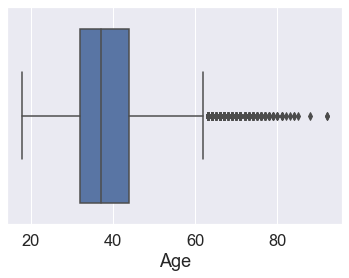

In [65]:
# The following line of code to plot for customers based on their age.
sns.boxplot(bank_df['Age'], orient='v')

In [18]:
bank_df.groupby('Age').Exited.std()

Age
18    0.294245
19    0.192450
20    0.220721
21    0.233295
22    0.352029
        ...   
83         NaN
84    0.707107
85         NaN
88         NaN
92    0.000000
Name: Exited, Length: 70, dtype: float64

In [60]:
bank_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

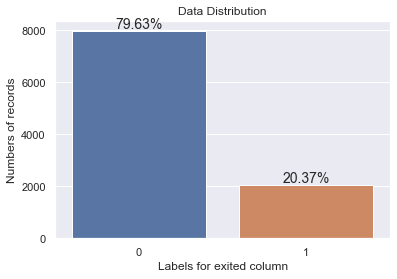

In [17]:
# The following line of codes for graphical representation of the target label percentage.
total_len = len(bank_df['Exited'])
sns.set()
sns.countplot(bank_df.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

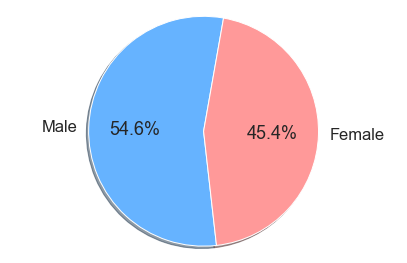

In [18]:
# The following line of codes to show how Gender impacted on the customers churn.
Gendervalues = bank_df['Gender'].value_counts().values.tolist()
GenderLabels = bank_df['Gender'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999']
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels, colors = colors, autopct='%1.1f%%', shadow=True, startangle= 80)
# Equal aspect ratio ensures that pie is drawn as a circle.
f3.axis('equal')
plt.tight_layout()
plt.show()

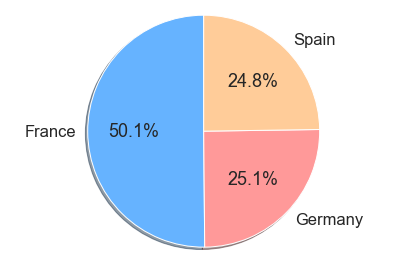

In [27]:
# The following line of codes shows how Geography is playing a role at customers churn.
Geosplit = bank_df.Geography.value_counts()
Geovalues = bank_df['Geography'].value_counts().values.tolist()
Geolabels = bank_df['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999', '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
f2.axis('equal')
plt.tight_layout()
plt.show()

## Observation.
* High rate customers with high 'Balance' is falling between 'Age' from 18 to 22 have the higher chance not to churn.
* High rate customers with 'NumOfProducts'is a higher chance to churn they are falling between 'Age' from 22 to 92. 
* High rate customers have the chance to churn & not to 'Exited' they are falling between 'Age' from 20 to 84. 
* Male customers have a higher percentage rate of 54% from female customers 45%.
* Geographically France customers have a higher percentage rate among all countries.
* 20.3% customers may be exited among 79.6% of total customers.

In [28]:
# Printing the skew of dataset distribution.
bank_df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [29]:
# The following line of code to describe Exited of dataset distribution.
bank_df['Exited'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

## Identifying Outliers with interquartile Range (IQR).
By calculating the differences between the 75th and 25th percentiles. it is represented by the formula IQR = Q3 - Q1. The lines of code below calculate and print the inequalities range for each of the variables in the dataset.

In [30]:
# The following line of code to calculate the interquartile range (IQR). 
from scipy import stats
Q1 = bank_df.quantile(0.25)
Q3 = bank_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64


Text(0.5, 1.0, 'CreditScore')

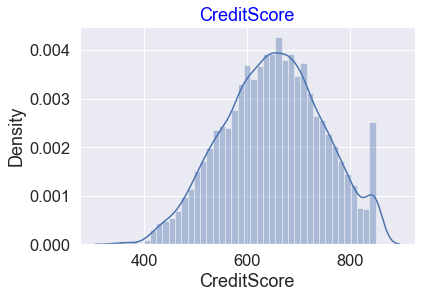

In [31]:
# The following line of code to plots distplot.
plt.figure(figsize=(6,4))
sns.distplot(bank_df['CreditScore']).set_title('CreditScore', color='blue')

## Observation.
normal distribution on the Credit score.

<AxesSubplot:xlabel='Age'>

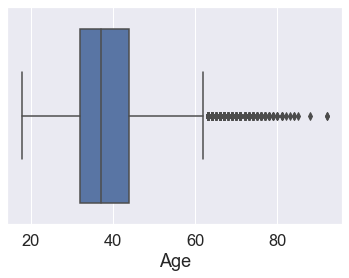

In [32]:
# will check if there are any outliers in the distribution of Ash. 
sns.boxplot(x='Age', data=bank_df, orient='h')

<AxesSubplot:>

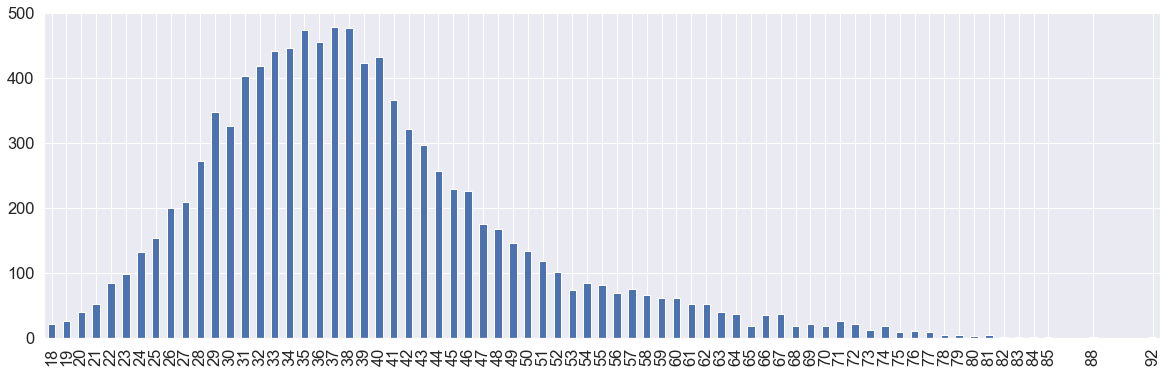

In [33]:
# The following line of code plots Age distribution.
bank_df["Age"].value_counts().plot.bar(figsize=(20,6))

## Observation. 
A normal distribution and skewness on the right on the 'Age' distribution.

In [34]:
# The following line of code to print dataset correlation.
bank_df.corr(method='kendall')

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.002767     0.003416  0.000351 -0.004838   
CustomerId        0.002767    1.000000     0.003967  0.005958 -0.010483   
CreditScore       0.003416    0.003967     1.000000 -0.005414  0.000791   
Age               0.000351    0.005958    -0.005414  1.000000 -0.007424   
Tenure           -0.004838   -0.010483     0.000791 -0.007424  1.000000   
Balance          -0.006304   -0.009763     0.004034  0.023611 -0.007016   
NumOfProducts     0.006663    0.015528     0.010118 -0.047761  0.010866   
HasCrCard         0.000489   -0.011451    -0.003110 -0.012666  0.019107   
IsActiveMember    0.009835    0.001373     0.019844  0.033027 -0.024508   
EstimatedSalary  -0.003990    0.010188     0.000807 -0.001571  0.005423   
Exited           -0.013531   -0.005115    -0.019049  0.268573 -0.011947   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.006304       0.006663   0.000489        0.009835   
CustomerId      -0.009763       0.015528  -0.011451        0.001373   
CreditScore      0.004034       0.010118  -0.003110        0.019844   
Age              0.023611      -0.047761  -0.012666        0.033027   
Tenure          -0.007016       0.010866   0.019107       -0.024508   
Balance          1.000000      -0.266748  -0.008407       -0.009828   
NumOfProducts   -0.266748       1.000000   0.003802        0.016051   
HasCrCard       -0.008407       0.003802   1.000000       -0.011866   
IsActiveMember  -0.009828       0.016051  -0.011866        1.000000   
EstimatedSalary  0.008200       0.010130  -0.008199       -0.009365   
Exited           0.094983      -0.123434  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.003990 -0.013531  
CustomerId              0.010188 -0.005115  
CreditScore             0.000807 -0.019049  
Age                    -0.001571  0.268573  
Tenure                  0.005423 -0.011947  
Balance                 0.008200  0.094983  
NumOfProducts           0.010130 -0.123434  
HasCrCard              -0.008199 -0.007138  
IsActiveMember         -0.009365 -0.156128  
EstimatedSalary         1.000000  0.009864  
Exited                  0.009864  1.000000

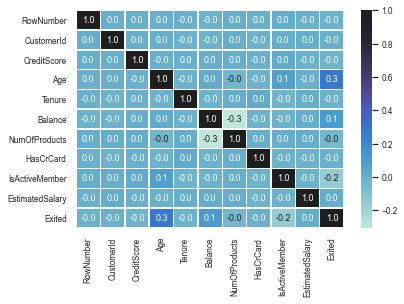

In [50]:
# The following code to plots heatmap.
sns.heatmap(bank_df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
fig.set_size_inches(20.7, 10.27)
plt.show() 

## Observation.
* The heatmap shows Age, Balance, and Estimated Salary are positively correlating with 'Exited'.
* whereas CreditScore, Tunure, NumOfProducts, HasCrCard, isActive member negatively correlate.
* Balance attribute is negatively correlated with NumOfProducts attribute.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

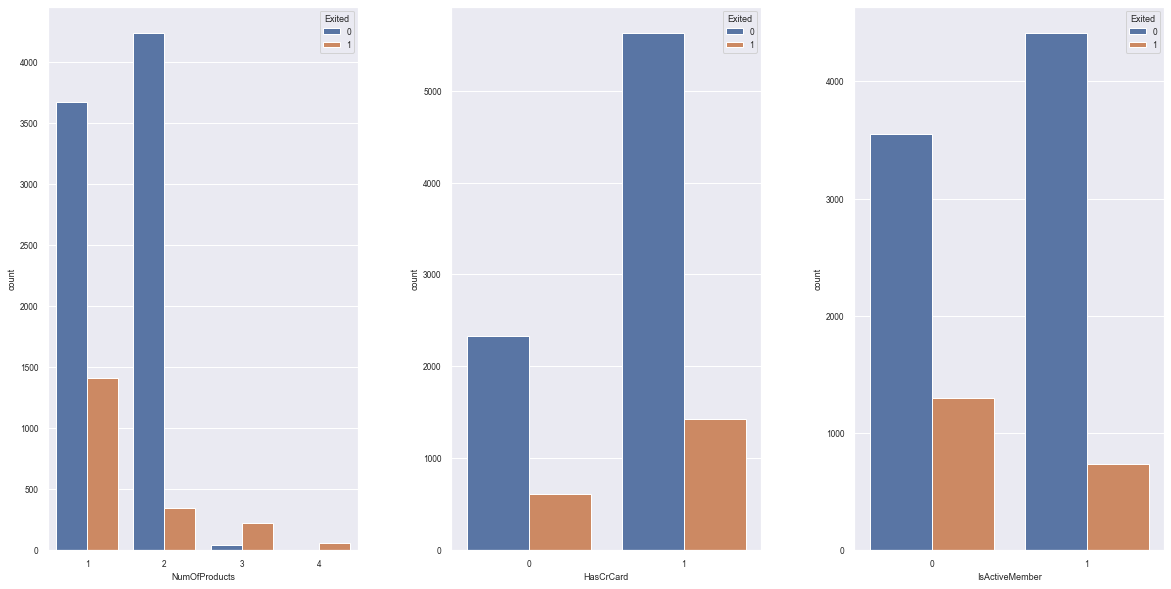

In [58]:
_, ax = plt.subplots(1, 3, figsize=(20,10))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = bank_df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = bank_df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = bank_df, ax = ax[2])

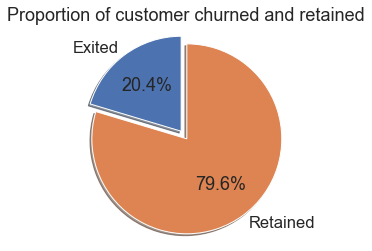

In [40]:
labels = 'Exited', 'Retained'
sizes = [bank_df.Exited[bank_df['Exited']==1].count(), bank_df.Exited[bank_df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 18)
plt.show()

# Observation.
 
Customers with 3 to 4 products is a higher chance to churn also about 20.4% of the customers have churned the baseline here the model could be predicted that 20.4% of the current customers will churn. altho 20.4% is a small number, we need to make sure that the chosen model does predict with great accuracy this 20.4% is of interest to the bank to identify and win their loyalty with the bank as opposed to accurately predicting the customers that retained

note to mention 40 to 70 years old customers are higher chances to churn Customer with CreditScore less than 400 are higher chances to churn 40 to 70 years old customers are higher chances to churn Customer with Credit Score less than 400 are higher chances to churn.

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

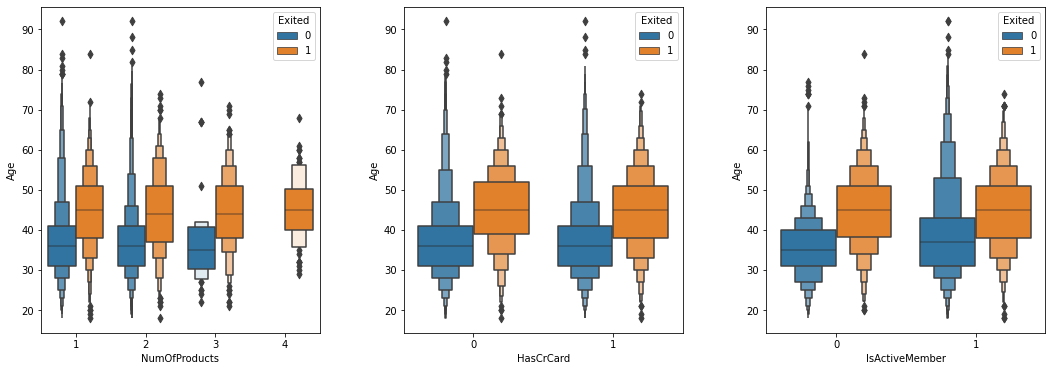

In [30]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.boxenplot(x = 'NumOfProducts', y = 'Age', hue='Exited', data = bank_df, ax= ax[0])
sns.boxenplot(x = 'HasCrCard', y = 'Age', data =bank_df, hue='Exited', ax= ax[1])
sns.boxenplot(x = 'IsActiveMember', y = 'Age', hue='Exited', data = bank_df, ax= ax[2])

## Observation. 
There is a few outliers on the 'Age' distribution, number of products,HasCrCard and Credit Score.

# <a id='link5'>Checking for error, duplicates and missing vales.</a>

In [31]:
pd.isnull(bank_df).count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [32]:
# Checking If there are any missing values in the dataset.
bank_df.isnull().values.any() 

False

In [33]:
# Checking If there are any null values in the dataset.
bank_df.isna().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
# The following code to check duplicates in the datasets.
dupes = bank_df.duplicated()
sum(dupes)

0

# <a id='link6'>Bivariate Analysis.</a>

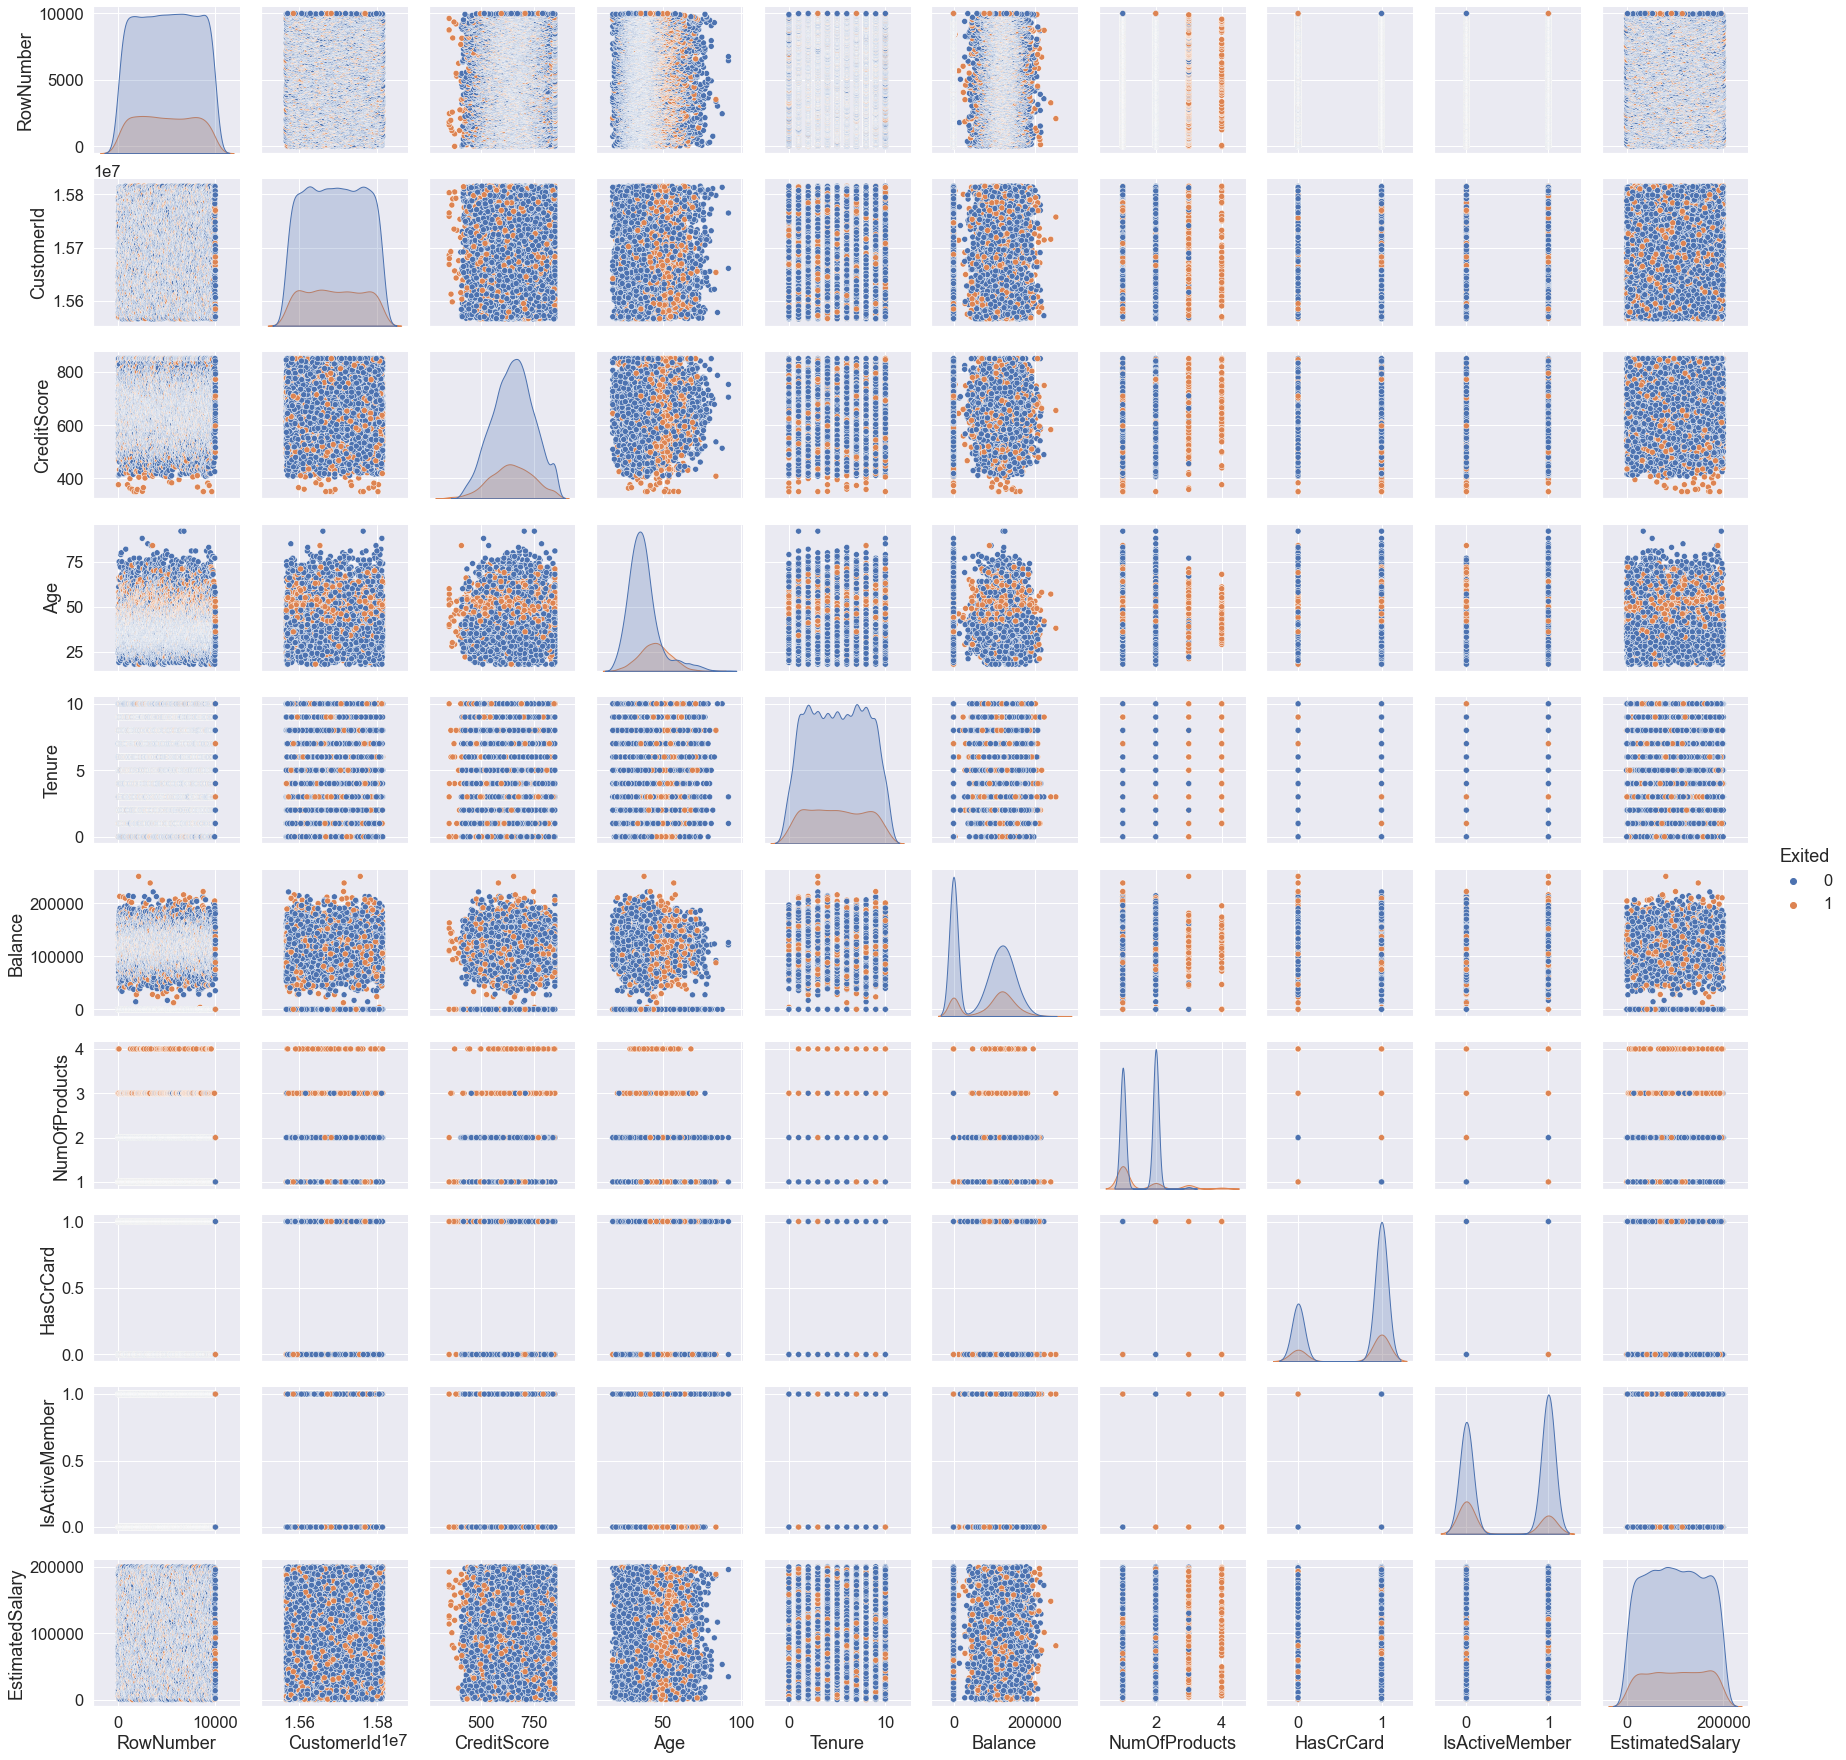

In [64]:
sns.pairplot(bank_df, hue = 'Exited')

## Data Preparation.

*The following line of codes to fill in null values in the dataset, there is some values in the feature are nulls will use the pandas fill() function to fill those values.

In [4]:
bank_df['Exited'].isnull()
bank_df['EstimatedSalary'].isnull()
bank_df=bank_df.fillna(method='ffill',limit=1)

#### The following code to segregate input and output variables also to drop some featuers which are unique for all users. 


In [5]:

x = bank_df.iloc[:, 3:13]
y = bank_df.iloc[:,13]

### Encoding Dataset Features.
ne Hot Encoding: Dataset contains two categorical variables’ GENDER’ and ‘GEOGRAPHY.’ Categorical values are of string datatype and are an essential feature in model training, so using one-hot encoding values are being transformed into numerical values.

In [6]:
geog=pd.get_dummies(x['Geography'])
geog

France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]

In [7]:
gend=pd.get_dummies(x['Gender'])
gend

Female  Male
0          1     0
1          1     0
2          1     0
3          1     0
4          1     0
...      ...   ...
9995       0     1
9996       0     1
9997       1     0
9998       0     1
9999       1     0

[10000 rows x 2 columns]

## DataSet Merging

In [8]:
x=pd.concat([x,geog,gend],axis=1)
x=x.drop(['Geography','Gender'],axis=1)
x.head(10)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   
5          645   44       8  113755.78              2          1   
6          822   50       7       0.00              2          1   
7          376   29       4  115046.74              4          1   
8          501   44       4  142051.07              2          0   
9          684   27       2  134603.88              1          1   

   IsActiveMember  EstimatedSalary  France  Germany  Spain  Female  Male  
0               1        101348.88       1        0      0       1     0  
1               1        112542.58       0        0      1       1     0  
2               0        113931.57       1        0      0       1     0  
3               0         93826.63       1        0      0       1     0  
4               1         79084.10       0        0      1       1     0  
5               0        149756.71       0        0      1       0     1  
6               1         10062.80       1        0      0       0     1  
7               0        119346.88       0        1      0       1     0  
8               1         74940.50       1        0      0       0     1  
9               1         71725.73       1        0      0       0     1


# <a id='link7'> Dataset Splitting Train and Test.</a>

In [9]:
x.shape, y.shape

((10000, 13), (10000,))

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


# <a id='link8'>Normalize the train and test data.</a>
Feature Scaling:
This technique is performed to standardize the independent input features. also it is done to avoid the dominance of one feature over the other and it is useful in avoiding the prediction results.

In [11]:
# Feature Scaling (very important)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
x.shape, y.shape

((10000, 13), (10000,))

## Converting the Xtrain into TF.

In [13]:
# the following line of code to convert the data elements into tensors, 
# as we need tensors to be fed into different tensorflow based operations

tf.convert_to_tensor(x_train)

<tf.Tensor: shape=(8000, 13), dtype=float64, numpy=
array([[ 1.69581762e-01, -4.64607961e-01,  6.66098761e-03,
        -1.21571749e+00,  8.09502898e-01,  6.42594969e-01,
        -1.03227043e+00,  1.10643166e+00, -1.01460667e+00,
        -5.69844396e-01,  1.74309049e+00,  1.09168714e+00,
        -1.09168714e+00],
       [-2.30455945e+00,  3.01025571e-01, -1.37744033e+00,
        -6.31192515e-03, -9.21591244e-01,  6.42594969e-01,
         9.68738398e-01, -7.48664468e-01, -1.01460667e+00,
         1.75486502e+00, -5.73693681e-01, -9.16013351e-01,
         9.16013351e-01],
       [-1.19119591e+00, -9.43128918e-01, -1.03141500e+00,
         5.79934688e-01, -9.21591244e-01,  6.42594969e-01,
        -1.03227043e+00,  1.48533467e+00,  9.85603617e-01,
        -5.69844396e-01, -5.73693681e-01,  1.09168714e+00,
        -1.09168714e+00],
       [ 3.55657799e-02,  1.09617188e-01,  6.66098761e-03,
         4.73127688e-01, -9.21591244e-01,  6.42594969e-01,
        -1.03227043e+00,  1.27652776e+00, -1

# <a id='link9'>Building ANN & Model Training.</a>

In [14]:
# The following line of codes to create object of sequentioal.
nn_classifier = Sequential()
# Adding the first hidden layer.
nn_classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
# Adding the second hidden layer.
nn_classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer.
nn_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## Compiling the ANN

In [15]:
ann_model=nn_classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the ANN on Training Set.
## Training [Forward pass and Backpropagation]

In [16]:
# model is trained over 100 epochs
ann_model=nn_classifier.fit(x_train,y_train,batch_size = 10, epochs = 100  )

Epoch 1/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4840 - accuracy: 0.7954
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4307 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4278 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4237 - accuracy: 0.8031
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4201 - accuracy: 0.8215
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8261
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8288
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8306
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4119 - accuracy: 0.8322
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4106 - accura

## Observation.
As indicated above with 100th EPOCH loss is reduced and accuracy has increased it is a good indication of the model performance.

### Classification Report and Confusion matrix Plotting:
Following line of code to rint a classification report to measure the quality of predictions from a classification algorithm. it will indicate how many predictions are True and how many are not. it will point the True positives, and False positives, True negatives and false negatives.

In [17]:
from sklearn.metrics import classification_report
y_pred = nn_classifier.predict(x_test)
print(classification_report(y_test.astype('int'), y_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



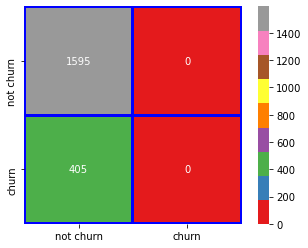

In [18]:
# The following line of codes to plot confusion matrix.
y_pred = nn_classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test.astype('int'), y_pred.astype('int'))
sns.heatmap(conf_matrix,annot=True,fmt='d', square= True,
           xticklabels=['not churn','churn'],
           yticklabels=['not churn','churn'],
           linewidths= 2,linecolor= 'blue', cmap= 'Set1')
plt.subplots_adjust(wspace= .3,hspace =.3)

# <a id='link10'>Prediction and Model Score/Accuracy.</a>

In [19]:
#prediction variable
y_pred = nn_classifier.predict(x_test)
#Model score calculation
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred.astype('int'),y_test.astype('int'))
print(score)

0.7975


# Making Predictions
After trained the ANN model and now it is ready to check its capability on predicting future churn results with our test set.

In [20]:
# The following line of code to predict on the Test set results.
y_pred = nn_classifier.predict(x_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

## Observation. 
Based on the model prediction the first five customers will not leave the bank while the sixth might leave.

 # <a id='link11'>Evaluating the ANN Model.</a>
 * To evaluate and make sure that the model is accurate and presents low variance, the best method to use is k-Fold CV to fix these problems.

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [22]:
# the following line of codes to evaluate the ANN model.
def build_classifier():
    y_pred = Sequential()
    y_pred.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_din = 13))
    y_pred.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    y_pred.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    y_pred.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return classifier
y_pred = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = y_pred, X = x_train, y = y_train, cv = 10, n_jobs = -1)

In [23]:
mean = accuracies.mean()
variance = accuracies.std()

## Improving the ANN(Dropout)

In [24]:
y_pred = Sequential()

y_pred.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
y_pred.add(Dropout(rate = 0.1))

y_pred.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
y_pred.add(Dropout(rate = 0.1))

y_pred.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
y_pred.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
y_pred.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4852 - accuracy: 0.7960
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4368 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4307 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.7960: 0s - loss: 0.4266 - accura
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4272 - accuracy: 0.8046
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4278 - accuracy: 0.8230
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4254 - accuracy: 0.8261
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4248 - accuracy: 0.8279
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.8299: 0s - loss: 0.4300 - accuracy
Epoch 10/100
800/800 [===========

In [25]:
y_pred.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 84        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


# <a id='link12'>Tuning The ANN Model using GridSearch.</a>

**GridSearch.**
GridSearch is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from time import time

In [ ]:
# the following line of codes to tune the ANN model.
def build_classifier(optimizer):
    ann_model = Sequential()
    ann_model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
    ann_model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    ann_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann_model 
ann_model = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],'epochs': [100, 500], 'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = ann_model,param_grid = parameters, scoring = 'accuracy',cv = 10)
start = time()
grid_search = grid_search.fit(x_train, y_train)


Epoch 1/100
288/288 [==============================] - 0s 1ms/step - loss: 0.5635 - accuracy: 0.7957
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7971
Epoch 3/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7971
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.7971
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7971
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.7971
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8042
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8174
Epoch 9/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8197
Epoch 10/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4164 - accura

## Best Parameters & Best Accuracy.

In [ ]:
# The following line of code to print the GridSearch results.
grid_search.cv_results_['mean_test_score']

In [ ]:
# The following line of codes to print best parameters 
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [43]:
best_parameters

{'batch_size': 32, 'epochs': 150, 'optimizer': 'rmsprop'}

In [48]:
# The following line of codes to print best accuracy
best_accuracy

0.843625

# <a id='link13'>Conclusion.</a>


Customer churn is a major problem of customers leaving services/products subscription and switching to another service provider. Due to the direct effect on profit margins, businesses organizations now are looking to identify customers who are at risk of churning and retaining them to gain back their loyalty and cope with competition by personalized promotional offers and adding value on the services quality in order to retain them, they need to identify the customers as well as the reason why? of churning so accordingly they can provide the customers with the best-personalized offers and products that suit their needs, this case study is about to find a solution to solve such problem.The objective of this given case study was to predict if a Bank customer, will leave or not by building a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

The initial observations about the problem bserations:
* High rate customers with high 'Balance' is falling between 'Age' from 18 to 22 have the higher chance not to churn.
* High rate customers with 'NumOfProducts'is a higher chance to churn they are falling between 'Age' from 22 to 92. 
* High rate customers have the chance to churn & not to 'Exited' they are falling between 'Age' from 20 to 84. 
* Male customers have a higher percentage rate of 54% from female customers 45%.
* Geographically France customers have a higher percentage rate among all countries.
* 20.3% customers may be exited among 79.6% of total customers.
**The solution.**
By building an ANN solution By implementing different ANN techniques I've to build a model that has an accuracy of approximately from 84% to 86%. to find out customers that can churn Hence the model is indeed excellent, to predict with a high percentage of accuracy also improvements can be made to more improve it.
**Note:** to mentioned prediction results of f1 score is 0.89 with accuracy: 0.8365%. the model was able to predict that the first five customers will not leave the bank while the sixth might leave so the bank has to focus on improving their services to retain back those customers.**

# <a id='link14'>References & GitHub Link.</a>

* https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
* https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
* https://keras.io/api/callbacks/
* https://towardsdatascience.com/3-ways-to-build-neural-networks-in-tensorflow-with-the-keras-api-80e92d3b5b7e
* https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/  
* https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
* https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db#:~:text=Principal%20Component%20Analysis%20(PCA)%20is,dimensionality%20reduction%20in%20machine%20learning.&text=PCA%20can%20also%20be%20used,the%20most%20amount%20of%20variance.
* Xing E., Jordan M., Karp R, “Feature selection for high￾dimensional 
  genomic microarray data,” Proceedings of the 
  Eighteenth International Conference on Machine Learning, 
  Massachusetts, USA: Morgan Kaufmann, 2001, 601–608.
* Ng, K. and Liu, H, “Customer retention via data mining,” AI 
  Review, 2000, (14): 569-590.
* Comparing Oversampling Techniques to Handle the 
  Class Imbalance Problem: A Customer Churn 
  Prediction Case Study 
  https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnu
  mber=7707454




# GitHub Link
* https://github.com/command20/This-repository-records-all-the-project-works-that-I-did-in-my-PGP-AIML-program-with-UT-Austin-and-G